In [24]:
import mne
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt

path = r'Aanand_19_01.csv'
sfreq = 120
#ch_names = ['Fp2', 'F4', 'F8', 'T8', 'Fp1', 'F3', 'F7', 'T7', 'Cz',
#            'C4', 'P4', 'O2', 'Pz', 'C3', 'P3', 'O1','stim']
df = pd.read_csv(path)
df.head()

,timestamps,Fp1,Fp2,C3,C4,P7,P8,O1,O2,F7,F8,F3,F4,T7,T8,P3,P4,stim,sfreq
0,1.709562e+09,-37315.566816,-37971.501109,-44301.649249,-39326.821485,-38091.932308,-42685.081683,-39995.362162,-45340.603035,-46383.580134,-44207.906033,-45612.847282,-82818.845847,-47694.107615,-55704.123462,-46313.172139,-56584.022234,0.0,125
1,1.709562e+09,-74676.597080,-75963.789340,-88632.936911,-78996.697545,-76203.310633,-85438.559704,-80021.703842,-90723.853198,-94142.060774,-87977.807281,-89926.566473,-114472.134646,-94306.346095,-180493.242203,-93103.375209,-106202.749157,0.0,125
2,1.709562e+09,-70195.832276,-71380.295918,-84370.906278,-75097.167503,-71921.431651,-81097.135675,-75507.679642,-86529.682461,-93178.342960,-84785.575841,-86176.167271,-113766.713591,-90730.156389,-180578.938792,-89466.031130,-104809.877850,0.0,125
3,1.709562e+09,-75372.898623,-76687.985860,-89306.842006,-79372.072741,-76887.944566,-86097.712648,-80749.387234,-91372.679636,-93151.386756,-85667.352160,-87404.350925,-113962.917204,-91830.532769,-180690.921031,-90602.080894,-105176.401755,0.0,125
4,1.709562e+09,-71427.502802,-72627.389148,-85527.877274,-76314.622320,-73081.621299,-82298.899567,-76746.994465,-87678.472719,-94171.565076,-87515.394391,-89263.390215,-114363.102837,-93716.796484,-180443.084889,-92489.417492,-106010.837079,0.0,125


In [25]:
temp = df.drop('stim', axis=1)

In [26]:
df = temp.drop('sfreq', axis=1)

In [27]:
df.head()

,timestamps,Fp1,Fp2,C3,C4,P7,P8,O1,O2,F7,F8,F3,F4,T7,T8,P3,P4
0,1.709562e+09,-37315.566816,-37971.501109,-44301.649249,-39326.821485,-38091.932308,-42685.081683,-39995.362162,-45340.603035,-46383.580134,-44207.906033,-45612.847282,-82818.845847,-47694.107615,-55704.123462,-46313.172139,-56584.022234
1,1.709562e+09,-74676.597080,-75963.789340,-88632.936911,-78996.697545,-76203.310633,-85438.559704,-80021.703842,-90723.853198,-94142.060774,-87977.807281,-89926.566473,-114472.134646,-94306.346095,-180493.242203,-93103.375209,-106202.749157
2,1.709562e+09,-70195.832276,-71380.295918,-84370.906278,-75097.167503,-71921.431651,-81097.135675,-75507.679642,-86529.682461,-93178.342960,-84785.575841,-86176.167271,-113766.713591,-90730.156389,-180578.938792,-89466.031130,-104809.877850
3,1.709562e+09,-75372.898623,-76687.985860,-89306.842006,-79372.072741,-76887.944566,-86097.712648,-80749.387234,-91372.679636,-93151.386756,-85667.352160,-87404.350925,-113962.917204,-91830.532769,-180690.921031,-90602.080894,-105176.401755
4,1.709562e+09,-71427.502802,-72627.389148,-85527.877274,-76314.622320,-73081.621299,-82298.899567,-76746.994465,-87678.472719,-94171.565076,-87515.394391,-89263.390215,-114363.102837,-93716.796484,-180443.084889,-92489.417492,-106010.837079


In [28]:
eeg_data = df.iloc[:,1:18].values.T
eeg_data[:-1] = eeg_data[:-1] * (10*(-6))
eeg_data[:-1] = eeg_data[:-1] / 4

ch_names = ['Fp1',	'Fp2'	,'C3'	,'C4'	,'P7'	,'P8'	,'O1'	,'O2'	,'F7'	,'F8'	,'F3'	,'F4'	,'T7'	,'T8'	,'P3'	,'P4']
info = mne.create_info(ch_names = ch_names, sfreq = sfreq, ch_types = ( ["eeg" ]*16))
raw = mne.io.RawArray(eeg_data, info)
raw.set_eeg_reference()

raw.filter(l_freq = 1,h_freq = 30)

Creating RawArray with float64 data, n_channels=16, n_times=65257
    Range : 0 ... 65256 =      0.000 ...   543.800 secs
Ready.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 397 samples (3.308 s)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    0.0s finished


Measurement date,Unknown
Experimenter,Unknown
Participant,Unknown
Digitized points,Not available
Good channels,16 EEG
Bad channels,None
EOG channels,Not available
ECG channels,Not available
Sampling frequency,120.00 Hz
Highpass,1.00 Hz
Lowpass,30.00 Hz


In [29]:
# import mne
# from mne.channels import DigMontage

# # Define electrode positions
# positions = {
#     'Fp1': (-0.3268, 0.6235, 0.0351),  # Replace x_fp1, y_fp1, z_fp1 with actual coordinates
#     'Fp2': (0.3268, 0.6235, 0.0351),  # Replace x_fp2, y_fp2, z_fp2 with actual coordinates
#     'F7': (-0.873, 0.431, 0.032),  # Replace x_f7, y_f7, z_f7 with actual coordinates
#     'F3': (-0.514, 0.474, 0.034),  # Replace x_f3, y_f3, z_f3 with actual coordinates
#     'Fz': (0, 0.55, 0.035),  # Replace x_fz, y_fz, z_fz with actual coordinates
#     'F4': (0.514, 0.474, 0.034),  # Replace x_f4, y_f4, z_f4 with actual coordinates
#     'F8': (0.873, 0.431, 0.032),  # Replace x_f8, y_f8, z_f8 with actual coordinates
#     'T7': (-0.973, -0.041, 0.031),  # Replace x_t7, y_t7, z_t7 with actual coordinates
#     'C3': (-0.327, -0.103, 0.031),  # Replace x_c3, y_c3, z_c3 with actual coordinates
#     'Cz': (0, 0, 0.034),  # Replace x_cz, y_cz, z_cz with actual coordinates
#     'C4': (0.327, -0.103, 0.031),  # Replace x_c4, y_c4, z_c4 with actual coordinates
#     'T8': (0.973, -0.041, 0.031),  # Replace x_t8, y_t8, z_t8 with actual coordinates
#     'P7': (-0.7, -0.685, 0.032),  # Replace x_p7, y_p7, z_p7 with actual coordinates
#     'P3': (-0.273, -0.796, 0.034),  # Replace x_p3, y_p3, z_p3 with actual coordinates
#     'Pz': (0, -0.847, 0.034),  # Replace x_pz, y_pz, z_pz with actual coordinates
#     'P4': (0.273, -0.796, 0.034),  # Replace x_p4, y_p4, z_p4 with actual coordinates
#     # Add coordinates for other electrodes
# }

# # Create a DigMontage object
# montage = DigMontage(pos=positions)

# # Set the montage for the info object
# info.set_montage(montage)


In [31]:
import numpy as np
import matplotlib.pyplot as plt
from mne.preprocessing import ICA

# Create and fit ICA
ica = ICA(n_components=16, random_state=97)
ica.fit(raw)

# Define the time window (100 to 150 seconds)
start_time = 100  # in seconds
stop_time = 150   # in seconds

# Get the indices corresponding to the time window
start_index = raw.time_as_index(start_time)
stop_index = raw.time_as_index(stop_time)

# Plot the independent component sources for the specified time window
ica.plot_sources(inst=raw, picks=np.arange(16), start=start_index[0], stop=stop_index[0], show=True)

# Show the plot
plt.show()

# Apply ICA to remove artifact components
raw_ica = ica.apply(raw)


Fitting ICA to data using 16 channels (please be patient, this may take a while)
Selecting by number: 16 components
Fitting ICA took 2.5s.
Creating RawArray with float64 data, n_channels=16, n_times=65257
    Range : 0 ... 65256 =      0.000 ...   543.800 secs
Ready.


C:\Users\LEGION\AppData\Local\Temp\ipykernel_15200\1399845543.py:7: RuntimeWarning: Using n_components=16 (resulting in n_components_=16) may lead to an unstable mixing matrix estimation because the ratio between the largest (10) and smallest (1.5e-27) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 15
  ica.fit(raw)
c:\Users\LEGION\AppData\Local\Programs\Python\Python39\lib\site-packages\mne\viz\_figure.py:372: RuntimeWarning: Mean of empty slice
  data -= np.nanmean(data, axis=1, keepdims=True)


ValueError: zero-size array to reduction operation maximum which has no identity

In [ ]:
duration = 1

epochs=mne.make_fixed_length_epochs(raw_ica, duration = duration, overlap=0,preload=True)

Not setting metadata
543 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 543 events and 120 original time points ...
0 bad epochs dropped


In [ ]:
epochs.drop_bad()  # This will drop bad epochs
num_epochs = len(epochs)
print("Total number of epochs created:", num_epochs)


Total number of epochs created: 543


In [ ]:
epochs.get_data()

C:\Users\LEGION\AppData\Local\Temp\ipykernel_15200\1251544707.py:1: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  epochs.get_data()


array([[[ 1.33624167e-04, -9.47498088e+04, -1.18741521e+05, ...,
          3.85317264e+03,  3.46872319e+03,  3.61651108e+03],
        [-8.27909080e-04, -8.71308303e+04, -1.09061071e+05, ...,
          3.49561617e+03,  3.07839256e+03,  3.29461233e+03],
        [-7.90493442e-04, -4.17954277e+03, -3.32603132e+03, ...,
          2.47012686e+02, -1.17021664e+02,  8.26795296e+00],
        ...,
        [ 4.76892550e-03,  1.05012041e+06,  1.34086027e+06, ...,
         -4.18614748e+04, -4.20055839e+04, -4.24215824e+04],
        [-1.31038807e-03,  2.93725832e+04,  3.14973297e+04, ...,
         -1.02827908e+03, -3.31477531e+02, -3.57925818e+02],
        [ 1.07119394e-02, -5.94410355e+05, -7.53691864e+05, ...,
          2.33233057e+04,  2.34286922e+04,  2.31509039e+04]],

       [[ 4.18322947e+03,  4.30787140e+03,  3.72145088e+03, ...,
          1.11163535e+02, -3.06561515e+02, -4.78897729e+02],
        [ 3.93564629e+03,  4.05160962e+03,  3.37494190e+03, ...,
          8.06618011e+01, -4.01839397e

c:\Users\LEGION\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\signal\_spectral_py.py:1999: UserWarning: nperseg = 256 is greater than input length  = 120, using nperseg = 120
  warnings.warn('nperseg = {0:d} is greater than input length '


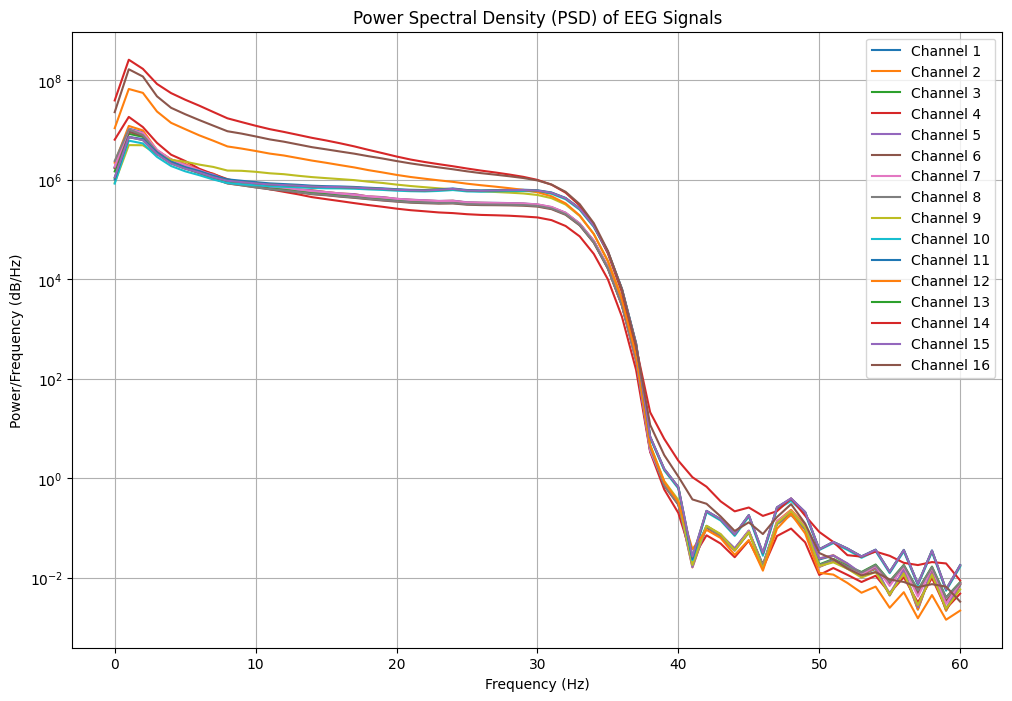

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import welch

data = epochs.get_data(copy=True)
sfreq = epochs.info['sfreq']
n_epochs, n_channels, n_time_points = data.shape

plt.figure(figsize=(12, 8))

for channel_idx in range(n_channels):
    # Calculate PSD for the current channel
    freqs, psd = welch(data[:, channel_idx, :], fs=sfreq, axis=-1)
    
    # Average PSD across epochs
    avg_psd = np.mean(psd, axis=0)
    
    # Plot the PSD
    plt.semilogy(freqs, avg_psd, label=f'Channel {channel_idx + 1}')

plt.xlabel('Frequency (Hz)')
plt.ylabel('Power/Frequency (dB/Hz)')
plt.title('Power Spectral Density (PSD) of EEG Signals')
plt.legend()
plt.grid(True)
plt.show()


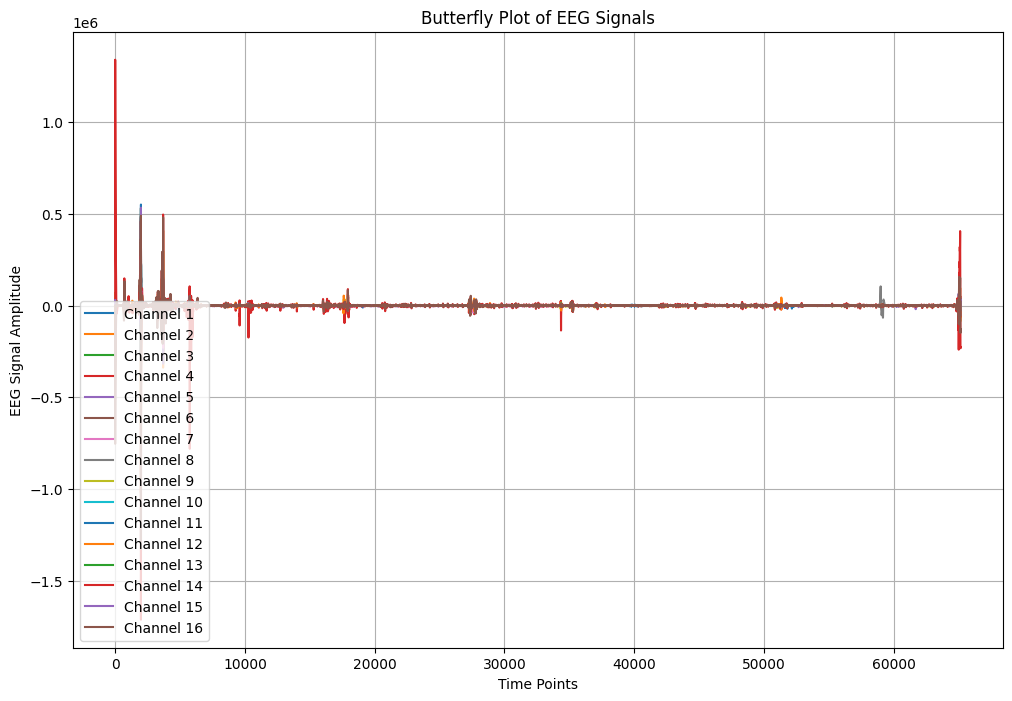

In [ ]:
data = epochs.get_data(copy=True) 
n_epochs, n_channels, n_time_points = data.shape
plt.figure(figsize=(12, 8))

for channel_idx in range(n_channels):
    channel_data = data[:, channel_idx, :].flatten()
    time_points = np.arange(n_time_points * n_epochs)
    plt.plot(time_points, channel_data, label=f'Channel {channel_idx + 1}')


plt.xlabel('Time Points')
plt.ylabel('EEG Signal Amplitude')
plt.title('Butterfly Plot of EEG Signals')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import mne

eeg_data = epochs.get_data()

condition_ranges = {'lev1': (100/duration, 200/duration),
                    'lev2': (280/duration, 380/duration),
                    'lev3': (420/duration, 520/duration)}

epochs_by_condition = {}
selected_epochs = []

for condition, (start_epoch, end_epoch) in condition_ranges.items():
    start_epoch = int(start_epoch)
    end_epoch = int(end_epoch)
    condition_epochs = epochs[start_epoch:end_epoch+1].copy()
    epochs_by_condition[condition] = condition_epochs
    selected_epochs.append(condition_epochs)

selected_epochs = mne.concatenate_epochs(selected_epochs)

for condition, epoch_data in epochs_by_condition.items():
    num_epochs = len(epoch_data)
    print(f"Number of epochs for {condition}: {num_epochs}")

print(f"Total number of selected epochs: {len(selected_epochs)}")


Not setting metadata
303 matching events found
No baseline correction applied
Number of epochs for lev1: 101
Number of epochs for lev2: 101
Number of epochs for lev3: 101
Total number of selected epochs: 303


C:\Users\LEGION\AppData\Local\Temp\ipykernel_15200\776002152.py:3: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  eeg_data = epochs.get_data()


In [ ]:

condition_of_interest = 'lev1'
epoch_array_for_condition = epochs_by_condition[condition_of_interest]
print(f"Epoch array shape for condition {condition_of_interest}: {epoch_array_for_condition.get_data().shape}")


Epoch array shape for condition lev1: (101, 16, 120)


C:\Users\LEGION\AppData\Local\Temp\ipykernel_15200\1489624503.py:3: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  print(f"Epoch array shape for condition {condition_of_interest}: {epoch_array_for_condition.get_data().shape}")


In [ ]:
condition_of_interest = 'lev1'
epoch_array_for_condition = epochs_by_condition[condition_of_interest]

In [ ]:
import pandas as pd
import numpy as np
from scipy.signal import welch



def calculate_psd_features(epoch_data, sfreq):
    psd_frequencies, psd_values = welch(epoch_data, fs=sfreq)
    psd_means = np.mean(psd_values, axis=1)  # Calculate mean PSD values for each channel
    psd_variances = np.var(psd_values, axis=1)  # Calculate variance of PSD values for each channel
    psd_std_devs = np.std(psd_values, axis=1)  # Calculate standard deviation of PSD values for each channel

    # Define the frequency range of interest (e.g., alpha band: 8-12 Hz)
    freq_min = 14
    freq_max = 30

    # Find the indices corresponding to the frequency range of interest
    idx_min = np.argmax(psd_frequencies > freq_min) - 1
    idx_max = np.argmax(psd_frequencies > freq_max)

    # Extract the PSD within the specified frequency range
    psd_values_alpha_band = psd_values[:, idx_min:idx_max]
    psd_means_alpha_band = np.mean(psd_values_alpha_band, axis=1)  # Calculate mean PSD values in alpha band for each channel
    psd_variances_alpha_band = np.var(psd_values_alpha_band, axis=1)  # Calculate variance of PSD values in alpha band for each channel
    psd_std_devs_alpha_band = np.std(psd_values_alpha_band, axis=1)  # Calculate standard deviation of PSD values in alpha band for each channel
    return psd_means_alpha_band, psd_variances_alpha_band, psd_std_devs_alpha_band

channel_names = epochs.ch_names
sfreq = epochs.info['sfreq']  # Sampling frequency

columns = [f'{feature}_{channel}' for feature in ['mean_psd', 'variance_psd', 'standarddev_psd'] for channel in channel_names]
columns.append('condition')
feature_df = pd.DataFrame(columns=columns)

def append_epoch_data(epoch_array, condition_label):
    global feature_df
    for epoch in epoch_array:
        psd_means, psd_variances, psd_std_devs = calculate_psd_features(epoch, sfreq)
        epoch_features = np.concatenate([psd_means, psd_variances, psd_std_devs])
        epoch_features = np.append(epoch_features, condition_label)
        epoch_df = pd.DataFrame([epoch_features], columns=columns)
        feature_df = pd.concat([feature_df, epoch_df], ignore_index=True)

append_epoch_data(epochs_by_condition['lev1'], 'lev1')
append_epoch_data(epochs_by_condition['lev2'], 'lev2')
append_epoch_data(epochs_by_condition['lev3'], 'lev3')

print("Shape of feature DataFrame:", feature_df.shape)
print(feature_df.head())


c:\Users\LEGION\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\signal\_spectral_py.py:1999: UserWarning: nperseg = 256 is greater than input length  = 120, using nperseg = 120
  warnings.warn('nperseg = {0:d} is greater than input length '


Shape of feature DataFrame: (303, 49)
         mean_psd_Fp1        mean_psd_Fp2         mean_psd_C3  \
0  1184.4874378651966  1384.2509529868537  1053.4569864178652   
1  1888.9779459236104  2091.1609076407917  1911.9832491083016   
2  2911.0257113144944  3239.7188267272177  2753.1760108306153   
3  2375.2907724764373  2840.5867906289427  2232.0682619309564   
4  1861.8027803666002  2277.5287713006674  1923.6098132897669   

          mean_psd_C4         mean_psd_P7         mean_psd_P8  \
0   317.1024693407106   1189.432454070841  1156.1482013779737   
1  247.41980926227995  1949.2327339696747  1760.5301805960328   
2  199.38885138386036  2804.7201550312307  2870.3941151097724   
3   276.9359073107395  2719.1722522971577  2441.1697854296076   
4  405.05529082826763  1970.4288355910558  1934.5718458624847   

          mean_psd_O1         mean_psd_O2         mean_psd_F7  \
0  1339.2231033443468  1127.9293797222804   770.1001097705287   
1   2006.281956814908  1682.0066774747079  1217.39

In [ ]:
# Rename columns using a dictionary
new_column_names = {
    'mean_psd_Fp1': 'mean_psd_Fp1',
    'mean_psd_Fp2': 'mean_psd_Fp2',
    'mean_psd_C3': 'mean_psd_C3',
    'mean_psd_C4': 'mean_psd_C4',
    'mean_psd_P7': 'mean_psd_P7',
    'mean_psd_P8': 'mean_psd_P8',
    'mean_psd_O1': 'mean_psd_O1',
    'mean_psd_O2': 'mean_psd_O2',
    'mean_psd_F7': 'mean_psd_F7',
    'mean_psd_F8': 'mean_psd_F8',
    'standarddev_psd_Fp1': 'stddev_psd_Fp1',
    'standarddev_psd_Fp2': 'stddev_psd_Fp2',
    'standarddev_psd_C3': 'stddev_psd_C3',
    'standarddev_psd_C4': 'stddev_psd_C4',
    'standarddev_psd_P7': 'stddev_psd_P7',
    'standarddev_psd_P8': 'stddev_psd_P8',
    'standarddev_psd_O1': 'stddev_psd_O1',
    'standarddev_psd_O2': 'stddev_psd_O2',
    'standarddev_psd_F7': 'stddev_psd_F7',
    'standarddev_psd_F8': 'stddev_psd_F8'
}

# Rename columns using the rename() method
feature_df.rename(columns=new_column_names, inplace=True)

# Print the DataFrame
print(feature_df.head())


         mean_psd_Fp1        mean_psd_Fp2         mean_psd_C3  \
0  1184.4874378651966  1384.2509529868537  1053.4569864178652   
1  1888.9779459236104  2091.1609076407917  1911.9832491083016   
2  2911.0257113144944  3239.7188267272177  2753.1760108306153   
3  2375.2907724764373  2840.5867906289427  2232.0682619309564   
4  1861.8027803666002  2277.5287713006674  1923.6098132897669   

          mean_psd_C4         mean_psd_P7         mean_psd_P8  \
0   317.1024693407106   1189.432454070841  1156.1482013779737   
1  247.41980926227995  1949.2327339696747  1760.5301805960328   
2  199.38885138386036  2804.7201550312307  2870.3941151097724   
3   276.9359073107395  2719.1722522971577  2441.1697854296076   
4  405.05529082826763  1970.4288355910558  1934.5718458624847   

          mean_psd_O1         mean_psd_O2         mean_psd_F7  \
0  1339.2231033443468  1127.9293797222804   770.1001097705287   
1   2006.281956814908  1682.0066774747079  1217.3903217422303   
2   3530.444778361227  

In [ ]:
feature_df

,mean_psd_Fp1,mean_psd_Fp2,mean_psd_C3,mean_psd_C4,mean_psd_P7,mean_psd_P8,mean_psd_O1,mean_psd_O2,mean_psd_F7,mean_psd_F8,...,stddev_psd_O2,stddev_psd_F7,stddev_psd_F8,standarddev_psd_F3,standarddev_psd_F4,standarddev_psd_T7,standarddev_psd_T8,standarddev_psd_P3,standarddev_psd_P4,condition
0,1184.4874378651966,1384.2509529868537,1053.4569864178652,317.1024693407106,1189.432454070841,1156.1482013779737,1339.2231033443468,1127.9293797222804,770.1001097705287,2103.8299496078134,...,2834.55343648561,1723.632716385568,5660.154321894951,6246.162763796456,926.7297286058811,6265.41504642446,589.7916553643415,6127.746231024983,670.4643233111096,lev1
1,1888.9779459236104,2091.1609076407917,1911.9832491083016,247.41980926227995,1949.2327339696747,1760.5301805960328,2006.281956814908,1682.0066774747079,1217.3903217422303,3196.833150129776,...,4010.3551566939987,2207.950001344093,7853.329709611473,9264.912132146745,1333.1492215489052,8817.922573648211,948.644754651855,8834.254060206846,985.6227120973225,lev1
2,2911.0257113144944,3239.7188267272177,2753.1760108306153,199.38885138386036,2804.7201550312307,2870.3941151097724,3530.444778361227,2550.8802386079487,1785.922741956216,3787.3498114076374,...,6385.828897823494,3691.1532611723605,9475.201041443153,11529.647821612369,2913.278177725023,11428.717630865693,1386.0345425524624,11267.973483947595,1582.3603363483226,lev1
3,2375.2907724764373,2840.5867906289427,2232.0682619309564,276.9359073107395,2719.1722522971577,2441.1697854296076,4268.584592108957,2316.617387640082,2089.667750840662,4340.40272372659,...,5927.712569202418,3902.248136300535,11123.338677077307,13370.034358833105,2039.49296193556,13123.440142528969,1109.7814858345723,13340.216295875805,977.3769671866254,lev1
4,1861.8027803666002,2277.5287713006674,1923.6098132897669,405.05529082826763,1970.4288355910558,1934.5718458624847,6664.656067018897,1780.2368391628365,1318.8271135165094,4190.644378622218,...,4569.113908399806,2359.5333898976487,10543.968314798929,12663.739402068022,1210.519663393465,12076.663752972232,2649.808788033297,12517.99821430449,1727.9933016045798,lev1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,1108.1334928738295,1411.1003023962392,1279.916524007295,111.90958737212976,1187.305390350457,1202.913476678065,1186.2314047939385,1187.0897929972175,1436.196579517256,2222.6526423162973,...,2275.1931978214757,1184.2643420614286,4664.276145616579,5049.979855217668,1003.9723554596845,5113.79043368633,2228.717834302883,5190.780325001561,1327.0460815866431,lev3
299,595.2623269374371,851.6501394809201,616.100873352568,77.35421574519268,576.1254130595805,730.3683872234217,806.8439580643326,755.6040346492637,783.2352584459043,1368.9930209600568,...,1672.9517778967252,986.5715977182105,3220.058071591477,3679.474421346805,504.05453217572244,4046.0455017026397,1156.7511636307652,4433.25368343839,924.9581003542013,lev3
300,408.95357683671756,358.584009606587,339.48062204263766,78.74579746352741,366.0357305657346,351.7891804485358,403.2142775133215,363.73693091625586,927.8923925920895,738.3863684662284,...,727.0288948723183,1423.1996509818148,1739.3761861030043,1583.5021278557606,465.59689749869983,1558.880242383003,1036.276175558873,1762.0153394689403,503.0740260409128,lev3
301,1648.313929209815,1753.9706845255168,1449.1987411288058,86.67571786423768,1439.5382038663138,1522.1314834462923,1654.2776047306047,1618.2322353252525,2650.0462035446703,2531.7637769405114,...,2383.9479491000875,3179.5912926485494,4158.244999505776,4363.380176769641,1956.3002205415485,4416.811641978506,4349.49527031951,4358.223249170409,2627.5317083281416,lev3


In [ ]:
# import matplotlib.pyplot as plt

# def plot_psd_features(psd_features, freqs, ch_names):
#     num_channels = len(ch_names)
    
#     fig, axs = plt.subplots(num_channels, figsize=(10, 6*num_channels))
#     for i, (channel_psd, channel_name) in enumerate(zip(psd_features, ch_names)):
#         axs[i].plot(freqs, channel_psd, label=channel_name)
#         axs[i].set_title(f'Power Spectral Density (PSD) for Channel {channel_name}')
#         axs[i].set_xlabel('Frequency (Hz)')
#         axs[i].set_ylabel('PSD')
#         axs[i].grid(True)
#         axs[i].legend()

#     plt.tight_layout()
#     plt.show()

# psd_frequencies, psd_values = welch(epoch_data[0], fs=sfreq)

# # Example usage:
# plot_psd_features(psd_values,  psd_frequencies, ch_names


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

X = feature_df.drop(columns=['condition'])
y = feature_df['condition']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

rf_classifier.fit(X_train, y_train)

y_pred = rf_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6721311475409836


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

log_reg_classifier = LogisticRegression(max_iter=1000, random_state=42)

# Train the classifier on the training data
log_reg_classifier.fit(X_train, y_train)

# Predict the labels for the test set
y_pred = log_reg_classifier.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.32786885245901637


c:\Users\LEGION\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

# Split the data into features (X) and target (y)
X = feature_df.drop(columns=['condition'])
y = feature_df['condition']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Gradient Boosting classifier
gb_classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

# Train the classifier on the training data
gb_classifier.fit(X_train, y_train)

# Predict the labels for the test set
y_pred = gb_classifier.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.6885245901639344
